## 2.4 Feature Viz

In [1]:
import os
from PIL import Image
import numpy as np
def load_mnist_data(base_path):
    data = {'train': [], 'val': [], 'test': []}
    labels = {'train': [], 'val': [], 'test': []}
    
    # Loop over each data split
    for split in ['train', 'val', 'test']:
        split_path = os.path.join(base_path, split)
        
        # Loop over each label folder within the split directory
        for label_folder in os.listdir(split_path):
            label_path = os.path.join(split_path, label_folder)
            
            # Check if the path is a directory
            if os.path.isdir(label_path):
                # Determine the label by counting the digits in the folder name
                label_count = len(label_folder) if label_folder.isdigit() else 0
                
                # Load each image in the folder
                for img_name in os.listdir(label_path):
                    img_path = os.path.join(label_path, img_name)
                    
                    # Open image, load data, then close immediately
                    with Image.open(img_path) as img:
                        data[split].append(np.array(img.copy()))  # Use img.copy() to load data into memory
                    labels[split].append(label_count)
                    
    return data, labels

import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torch

class MultiMNISTDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        """
        Args:
            images (list): List of image file paths.
            labels (list): List of labels indicating the number of digits.
            transform (callable, optional): Optional transform to apply on an image.
        """
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        """Returns the total number of images."""
        return len(self.images)

    def __getitem__(self, idx):
        """Loads an image and its label, applies any specified transformation."""
        img = self.images[idx]  # This is a NumPy array
        label = self.labels[idx]
        
        # Convert NumPy array to PyTorch tensor
        img = torch.tensor(img, dtype=torch.float32) / 255.0  # Normalize to [0, 1]
        img = img.unsqueeze(0)  # Add channel dimension for (1, H, W)

        label = torch.tensor(label, dtype=torch.float32)
        
        if self.transform:
            img = self.transform(img)

        return img, label

# Function to create dataloaders
def create_dataloaders(data, labels, batch_size=32):
    loaders = {}
    for split in ['train', 'val', 'test']:
        dataset = MultiMNISTDataset(data[split], labels[split])
        loaders[split] = DataLoader(dataset, batch_size=batch_size, shuffle=(split == 'train')) #shuffle only for train set
    return loaders


# Example usage
# Assuming `load_mnist_data()` has been implemented to load and organize data as per assignment requirements
base_path = './../../data/external/double_mnist'
data, labels = load_mnist_data(base_path)

# Create dataloaders for each split
dataloaders = create_dataloaders(data, labels, batch_size=32)

# Access train loader
train_loader = dataloaders['train']
val_loader = dataloaders['val']
test_loader = dataloaders['test']

print(train_loader)
print(len(train_loader))

394


Epoch [1/3], Training Loss: 0.1204
Epoch [1/3], Validation Loss: 0.0045
Epoch [2/3], Training Loss: 0.0163
Epoch [2/3], Validation Loss: 0.0251
Epoch [3/3], Training Loss: 0.0182
Epoch [3/3], Validation Loss: 0.0034

Feature Maps for Selected Image 1:
Layer 1 feature map shape: torch.Size([32, 64, 64])
Layer 2 feature map shape: torch.Size([32, 64, 64])
Layer 3 feature map shape: torch.Size([32, 64, 64])


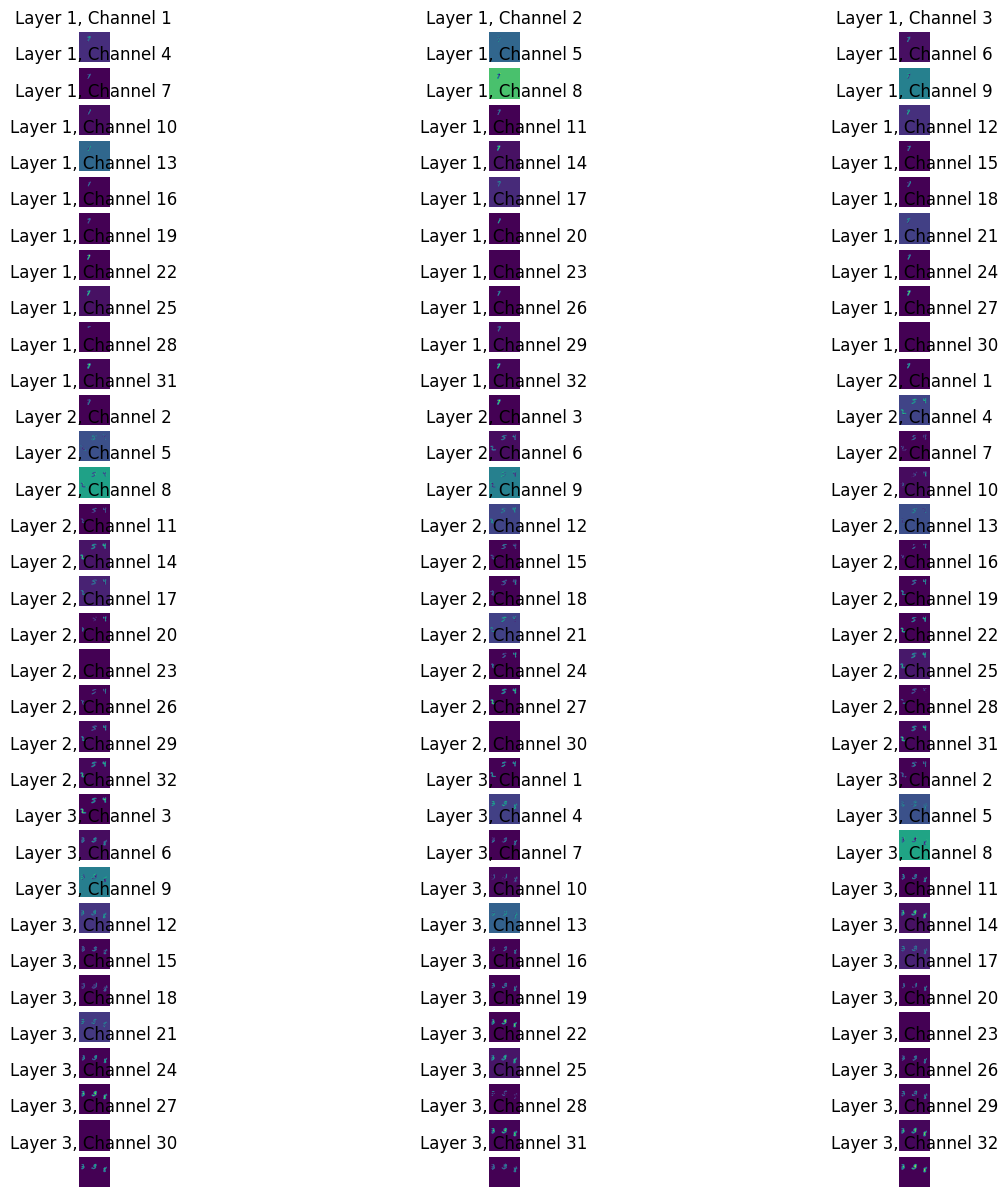


Feature Maps for Selected Image 2:
Layer 1 feature map shape: torch.Size([32, 64, 64])
Layer 2 feature map shape: torch.Size([32, 64, 64])
Layer 3 feature map shape: torch.Size([32, 64, 64])


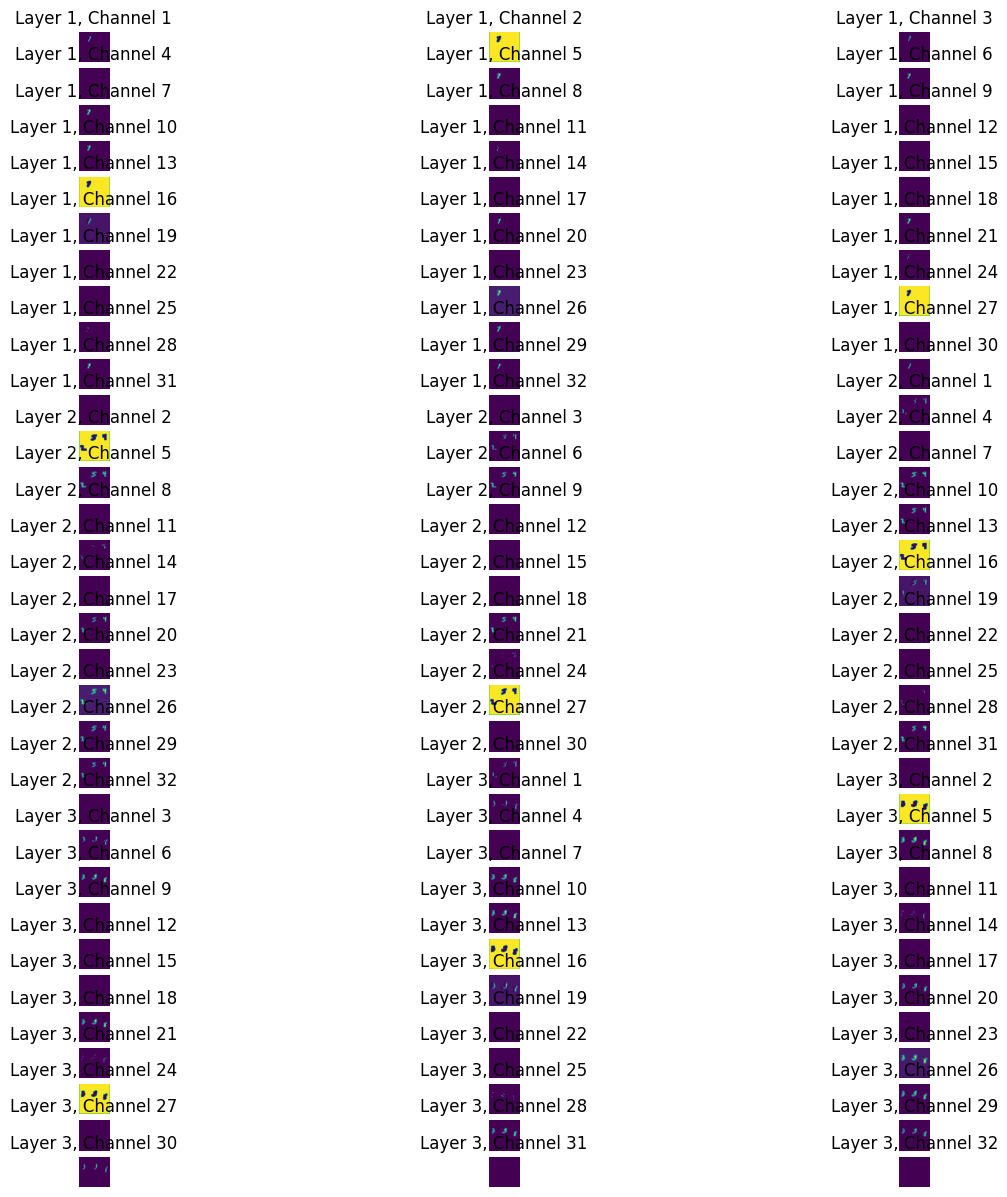


Feature Maps for Selected Image 3:
Layer 1 feature map shape: torch.Size([32, 64, 64])
Layer 2 feature map shape: torch.Size([32, 64, 64])
Layer 3 feature map shape: torch.Size([32, 64, 64])


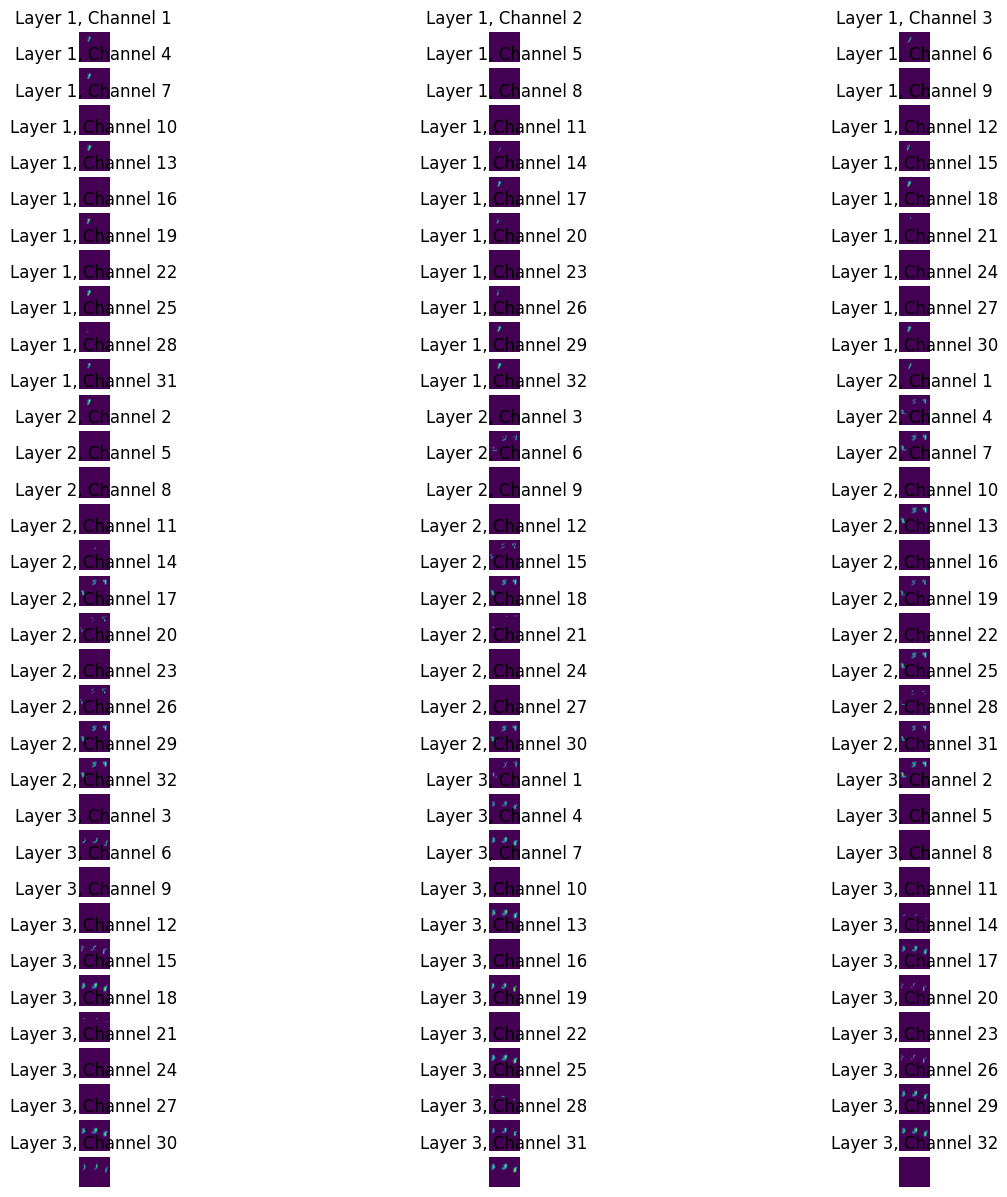


Feature Maps for Selected Image 4:
Layer 1 feature map shape: torch.Size([64, 32, 32])
Layer 2 feature map shape: torch.Size([64, 32, 32])
Layer 3 feature map shape: torch.Size([64, 32, 32])


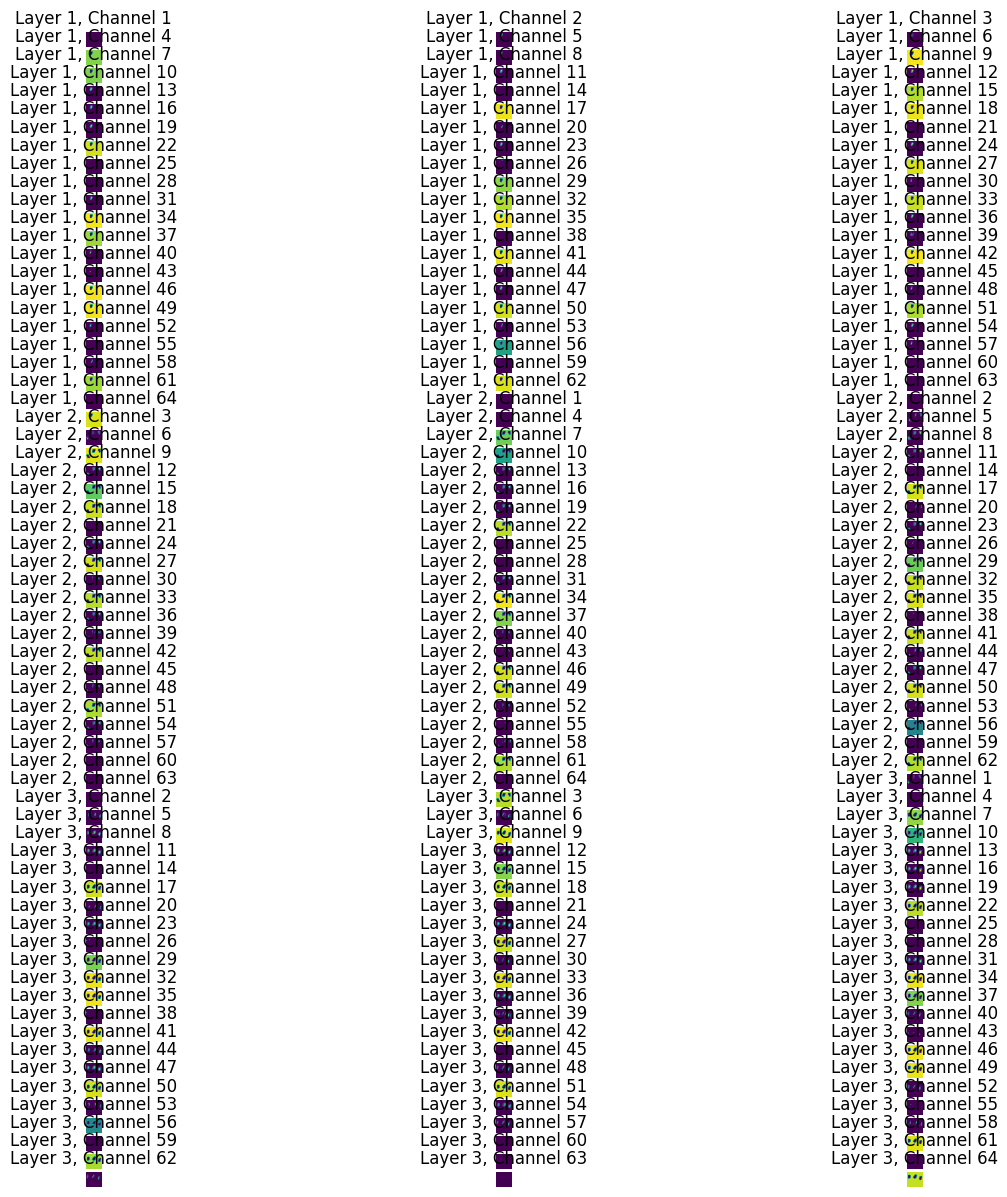

([0.12039124225909664, 0.016280143990439075, 0.018208524893515897],
 [0.004522505589174644, 0.025116949927581678, 0.0034173130507066706])

In [3]:
import os
os.chdir('C:/Users/Pavan/Desktop/smai-m24-assignments-codepk37/smai-m24-assignments-codepk37')

from models.cnn.cnn import CNNViz,train_modelViz

model = CNNViz(task='classification', num_classes=10, num_conv_layers=2, dropout_rate=0.2)

# Train the model
train_modelViz(model, train_loader, val_loader=val_loader, 
                                        num_epochs=3, optimizer='adam', 
                                        learning_rate=0.001)

### Inference of Features Learned at Different Layers

In a multi-label classification CNN, the feature maps reveal the types of features learned at various layers:

#### 1. Early Layers
- **Features:** Simple patterns like edges and textures.
- **Description:** These layers detect basic visual elements such as horizontal and vertical edges, gradients, and simple textures, focusing on areas of high contrast.

#### 2. Intermediate Layers
- **Features:** Complex shapes and parts of objects.
- **Description:** The network starts recognizing combinations of edges and shapes, capturing more intricate features like specific object parts (e.g., wheels, eyes) and configurations of simpler features.

#### 3. Deeper Layers
- **Features:** High-level semantic features.
- **Description:** These layers learn to identify entire objects or classes, focusing on the characteristics that define each class. They represent overall context and meaning, such as specific textures or arrangements unique to certain objects.
